In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.tsa.arima_model as sta
import pmdarima.arima as pa

In [2]:
plt.rcParams["figure.figsize"]=(10,4)

데이터 불러오기
==========


In [3]:
Data=pd.read_excel("https://data.hossam.kr/E06/covid19_seoul_230531.xlsx")

In [4]:
data=pd.DataFrame(Data)

In [5]:
data=data.loc[data.index[::-1]]

데이터 전처리
------------

In [6]:
use_data=data[[data.columns[0],data.columns[2]]]
use_data.columns=["date","confirmed"]
use_data["date"]=use_data["date"].apply(lambda x:pd.to_datetime(x))
use_data.set_index("date",inplace=True)
use_data.index.name=np.nan

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_9048\2085686974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data["date"]=use_data["date"].apply(lambda x:pd.to_datetime(x))


In [7]:
use_data

,confirmed
nan,
2020-02-05,0.0
2020-02-06,0.0
2020-02-07,0.0
2020-02-08,0.0
2020-02-09,0.0
...,...
2023-05-27,4078.0
2023-05-28,1393.0
2023-05-29,1393.0


데이터 검정
----------

In [8]:
use_data.describe()

,confirmed
count,1211.000000
mean,5123.637490
std,12099.404893
min,0.000000
25%,120.000000
50%,659.000000
75%,4204.000000
max,128375.000000


<Axes: xlabel='nan'>

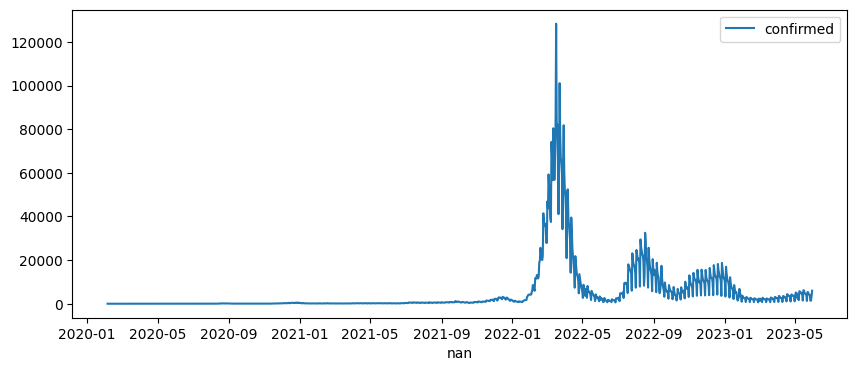

In [9]:
plt.figure()
sb.lineplot(data=use_data)

### 예측을 위해서 일부부만 가져오겠음

In [10]:
pre_data=use_data.loc[use_data.index>pd.to_datetime("2023.01.01")]

In [11]:
pre_data.dropna(inplace=True)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_9048\3445756594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_data.dropna(inplace=True)


<Axes: xlabel='nan'>

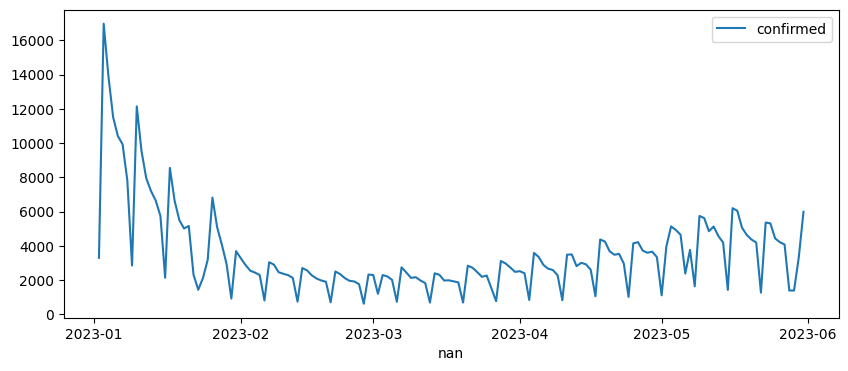

In [12]:
plt.figure()
sb.lineplot(data=pre_data)

### 계절성

In [13]:
import statsmodels.tsa.seasonal as sts

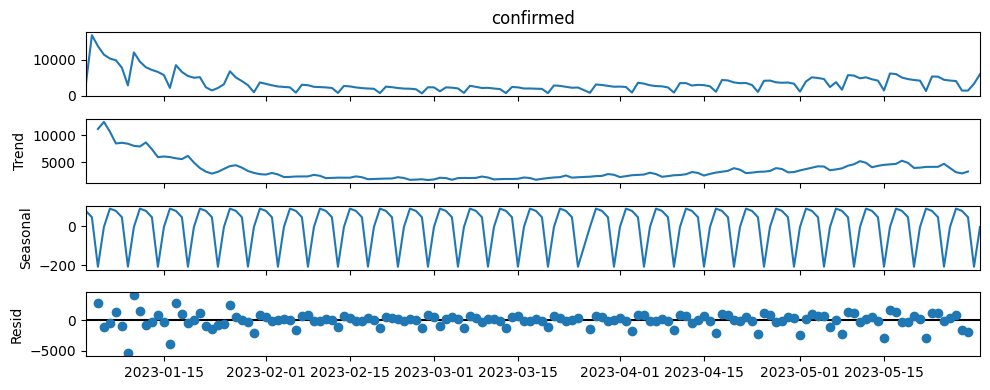

In [14]:
result=sts.seasonal_decompose(pre_data["confirmed"],period=5)
result.plot()
plt.show()
plt.close()

In [15]:
# 학습데이터
idx=pre_data.index<pd.to_datetime("2023.05.01")
idx2=pre_data.index>=pd.to_datetime("2023.05.01")
Train=pre_data[idx]
Test=pre_data[idx2]

<Axes: >

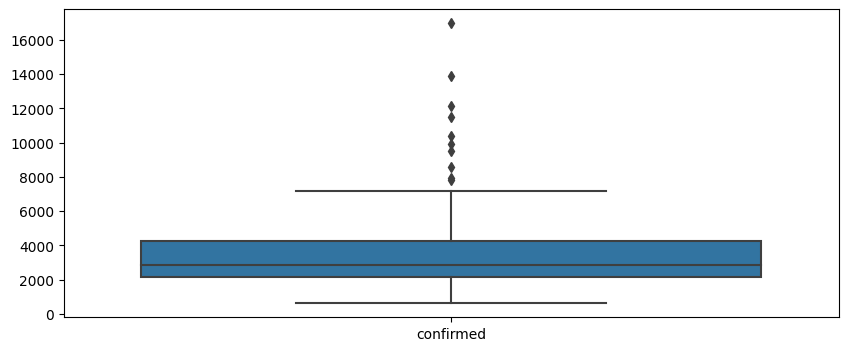

In [16]:
plt.figure()
plt.rcParams["figure.figsize"]=(2,3)
sb.boxplot(data=pre_data)

#### 실제 데이터 이므로 이상치를 제거하지 않겠음

### ACF,PACF 검정

In [17]:
import statsmodels.graphics.tsaplots as sgt

In [18]:
plt.rcParams["figure.figsize"]=(10,3)

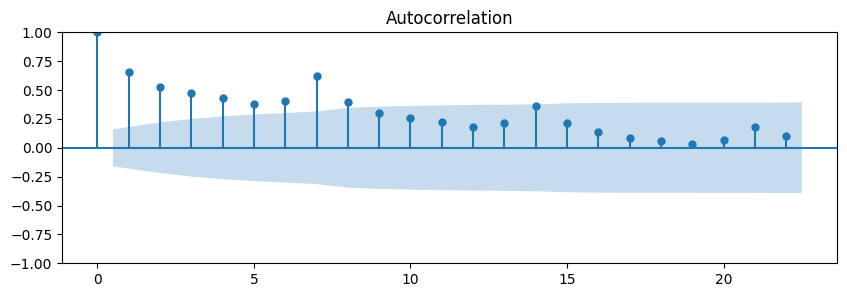

In [19]:
sgt.plot_acf(pre_data["confirmed"])
plt.show()
plt.close()

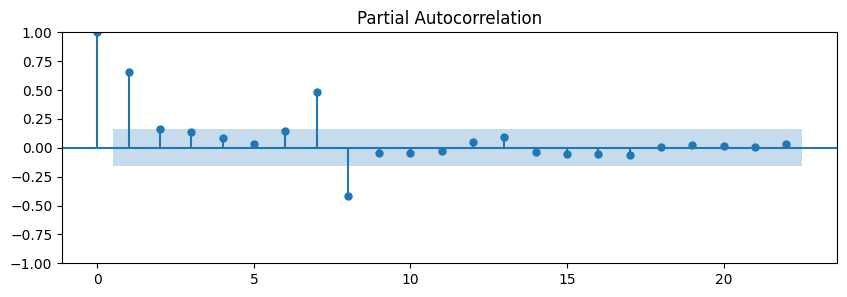

In [21]:
sgt.plot_pacf(pre_data["confirmed"])
plt.show()
plt.close()

#### 결과
q=9,    p=1
